In [13]:
import numpy as np
import matplotlib.pyplot as plt
path=r"C:\Users\johni\Desktop\physics\images\\"
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error, r2_score

#GIA THN ASKHSH OPOY A BAZO B KAI ANAPODA, GIATI TA EXEI ANAPODA STHN EKFONISI
#KAI OPOY PARABOLIKA ALLAZO A ME C GIATI PALI EINAI ANAPODA :p

#The standard variables
N=20
e=0.1

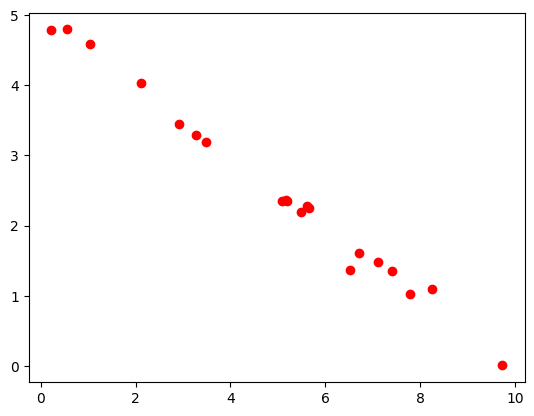

In [14]:
x=np.random.uniform(0, 10, size=N)
y=np.array([])
for value in x:
    y_value=np.random.normal(-0.5*value+5, e)
    y=np.append(y,y_value)
plt.plot(x,y, 'ro')

([<matplotlib.axis.XTick at 0x1686fb6b730>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

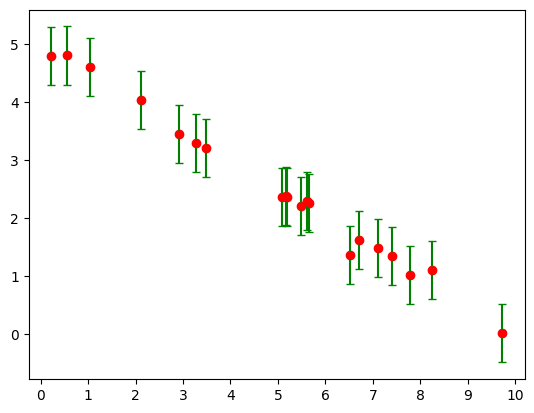

In [15]:
plt.plot(x,y, 'ro')
plt.errorbar(x, y, yerr=0.5, fmt='ro', markersize=5, capsize=3, ecolor='g', label='Means')
plt.xticks(ticks=[0, 1,2,3,4,5,6,7,8,9,10])

Linear Adjustment

In [ ]:
# calculate the means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# calculate the differences between each data point and the means of x and y
diff_x = x - x_mean
diff_y = y - y_mean

# calculate the product of the differences between x and y
prod_diff = diff_x * diff_y

# calculate the squared differences between x
sq_diff_x = (x - x_mean)**2

# calculate the slope b
b = np.sum(prod_diff) / np.sum(sq_diff_x)

# calculate the intercept a
a = y_mean - b * x_mean

# compute the predicted values y_pred
y_pred = a + b * x

# calculate the residual values
residual = y - y_pred

# calculate the sum of the squared residuals
sum_residuals = np.sum(residual**2)

# calculate the total sum of squares
tot_ss = np.sum((y - y_mean)**2)

# calculate the coefficient of determination (R-squared)
R_squared = 1 - (sum_residuals / tot_ss)

# print the slope, intercept, and R-squared
print("Slope: ", b)
print("Intercept: ", a)

In [16]:
A=np.empty((0, 2), float)
B=y
for value in x:
    A=np.vstack([A,[value, 1]])
ata=np.transpose(A)@A
atb=np.transpose(A)@B

const=np.linalg.solve(ata, atb)

a=const[0]
b=const[1]
const

#Covariance of estimators

s2 = np.sum((y - A @ const)**2) / (N - 2)  # residual variance estimate
var_beta_hat = s2 * np.linalg.inv(A.T @ A)
var_beta_hat

#s2 = np.sum((y - A @ const)**2)  # sum of squared residuals
#s = np.sqrt(s2 / (N-3))
#std_beta_hat = s* np.sqrt(np.diag(np.linalg.inv(A.T @ A)))
#SST = np.sum((y - np.mean(y))**2)  # total sum of squares
#df_model = 1  # degrees of freedom for the model
#df_resid = N - 2  # degrees of freedom for the residuals
#chi2_min = s2 / df_resid  # chi-square minimum
#p_value = 1 - chi2.cdf(chi2_min, df_resid)  # p-value


array([[ 0.00011827, -0.00058713],
       [-0.00058713,  0.0037052 ]])

In [18]:
b

5.000145857791919

Parabolic Adjustment

In [19]:
A=np.empty((0, 3), float)
B=y
for value in x:
    A=np.vstack([A,[value*value, value, 1]])
ata=np.transpose(A)@A
atb=np.transpose(A)@B

const2=np.linalg.solve(ata, atb)

a2=const2[0]
b2=const2[1]
c2=const2[2]

s2 = np.sum((y - A @ const2)**2) / (N - 3)  # residual variance estimate
var_beta_hat = s2 * np.linalg.inv(A.T @ A)
var_beta_hat


array([[ 1.60878297e-05, -1.48450511e-04,  2.32948004e-04],
       [-1.48450511e-04,  1.49384275e-03, -2.76517531e-03],
       [ 2.32948004e-04, -2.76517531e-03,  7.25820555e-03]])

In [22]:
c2

5.0238221358132105

Text(0.5, 1.0, 'Parabolic Regression')

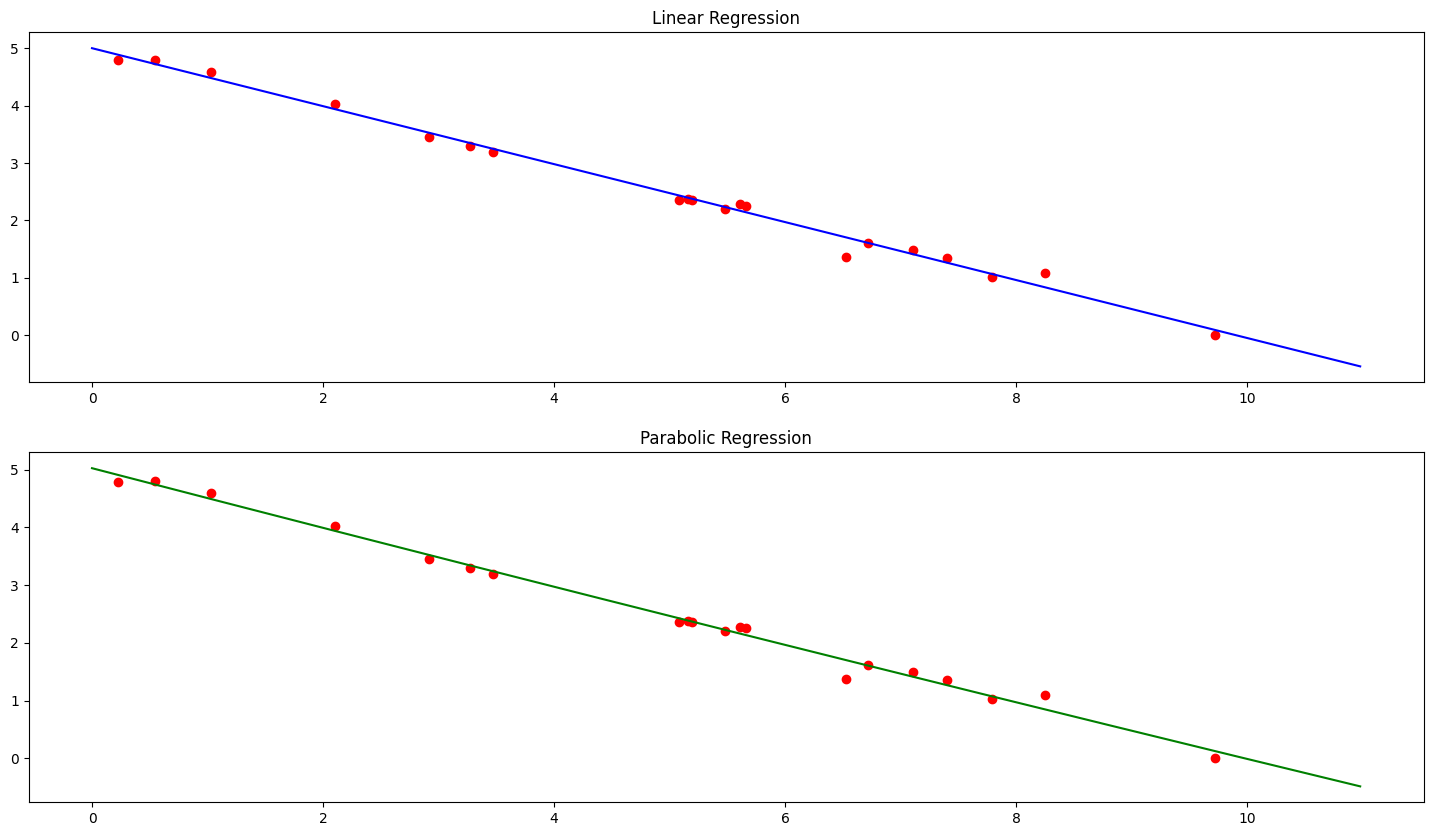

In [23]:
x_plots=np.arange(0,11,0.02)
fig, ax = plt.subplots(2, figsize=(18, 10))

ax[0].plot(x,y, 'ro')
ax[1].plot(x,y, 'ro')

ax[0].plot(x_plots,a*x_plots+b, '-b')
ax[1].plot(x_plots,a2*x_plots*x_plots+b2*x_plots+c2, '-g')

ax[0].set_title("Linear Regression")

ax[1].set_title("Parabolic Regression")

In [24]:
#Compare the models
y_pred_linear=a*x+b
y_pred_parab=a2*x*x+b2*x+c2
rmse_linear = mean_squared_error(y, y_pred_linear, squared=False)
rmse_parab = mean_squared_error(y, y_pred_parab, squared=False)

r_squared_linear = r2_score(y, y_pred_linear)
r_squared_parab = r2_score(y, y_pred_parab)

print(rmse_linear, rmse_parab, r_squared_linear, r_squared_parab)

0.11928739291567944 0.11870856172576708 0.9917100684268313 0.9917903255062852
